In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding , LSTM , Dense , Dropout , Bidirectional


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report ,accuracy_score

nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ishantagrawal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data_fake = pd.read_csv("Fake.csv")
data_true = pd.read_csv("True.csv")

In [3]:
data_fake['label']=0
data_true['label']=1

In [4]:
df=pd.concat([data_fake,data_true] , ignore_index=True)
df=df.sample(frac=1).reset_index(drop=True)


In [5]:
stop_words=set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

df['text']=df['text'].apply(clean_text)


In [6]:
X=df['text']
y=df['label']

(array([23481.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 21417.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

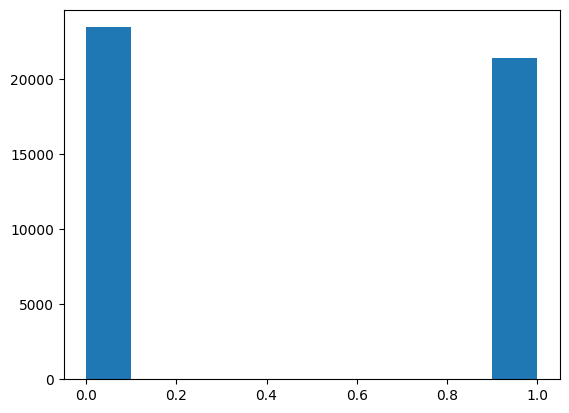

In [7]:
plt.hist(y)

In [8]:
tokenizer=Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)
sequences=tokenizer.texts_to_sequences(X)


In [16]:
X_padded=pad_sequences(sequences , maxlen=500)

In [19]:
X_padded.shape

(44898, 500)

In [21]:
y.shape

(44898,)

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X_padded,y,test_size=0.2 ,random_state=42)

In [30]:
model=Sequential()
model.add(Embedding(input_dim=5000 , output_dim=128 , input_length=500))
# model.add(Bidirectional(LSTM(64,return_sequences=True)))
# model.add(Dropout(0.5))
model.add(LSTM(32))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam' , metrics=['accuracy'])


In [31]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [33]:
from tensorflow.keras.callbacks import EarlyStopping
mycallbacks = [EarlyStopping(monitor='val_loss', patience=5)]
# history = model.fit(train_ds,
#                  validation_data=val_ds,
#                  epochs=50,
#                  callbacks=mycallbacks)
with tf.device('/GPU:0'):
    history1 = model.fit(X_train, y_train, epochs=10, validation_split=0.2, callbacks=mycallbacks)


Epoch 1/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 35s 40ms/step - accuracy: 0.9763 - loss: 0.0926 - val_accuracy: 0.9894 - val_loss: 0.0451
Epoch 2/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 40s 44ms/step - accuracy: 0.9727 - loss: 0.0791 - val_accuracy: 0.9723 - val_loss: 0.0842
Epoch 3/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 40s 45ms/step - accuracy: 0.9878 - loss: 0.0446 - val_accuracy: 0.9891 - val_loss: 0.0419
Epoch 4/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 42s 47ms/step - accuracy: 0.9954 - loss: 0.0193 - val_accuracy: 0.9816 - val_loss: 0.0616
Epoch 5/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 36s 40ms/step - accuracy: 0.9919 - loss: 0.0294 - val_accuracy: 0.9772 - val_loss: 0.0747
Epoch 6/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 35s 39ms/step - accuracy: 0.9893 - loss: 0.0354 - val_accuracy: 0.9818 - val_loss: 0.0651
Epoch 7/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 36s 40ms/step - accuracy: 0.9940 - loss: 0.0196 - val_accuracy: 0.9820 - val_loss: 0.0633
Epoch 8/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 42s 46ms/step - accuracy: 0.9953 - loss: 0.0168 - 

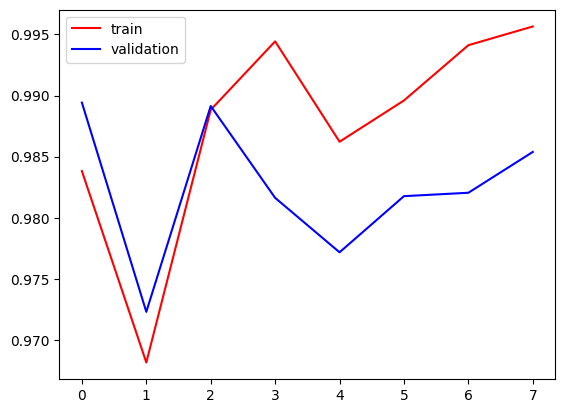

In [34]:
plt.plot(history1.history['accuracy'], color = 'red', label = 'train')
plt.plot(history1.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

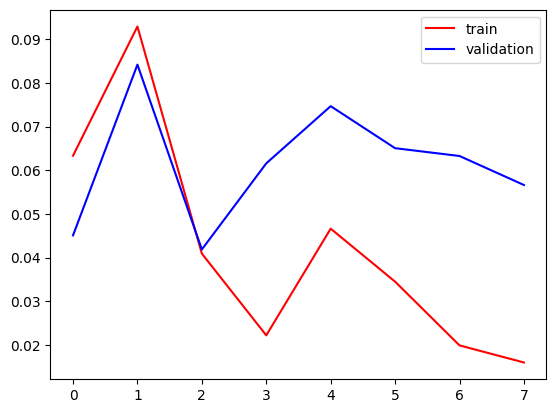

In [35]:
plt.plot(history1.history['loss'], color = 'red', label = 'train')
plt.plot(history1.history['val_loss'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

In [36]:
y_pred = model.predict(X_test)

281/281 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


In [38]:
y_pred = np.where(y_pred>0.5, 1, 0)

In [39]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9839643652561247


In [45]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      4747
           1       0.98      0.98      0.98      4233

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980

